# Decomposition en Valeur Singulière (SVD)

### L'algorithme SVD (Décomposition en Valeurs Singulières) est une méthode d'analyse de données qui permet de réduire la  dimensionnalité des données tout en préservant autant d'informations que possible

# 1.	Cas d’application de la SVD dans la société 


##### La SVD peut être utilisée à diverses fins, telles que la réduction de dimensionnalité, la compression de données, la reconstruction de matrices, le traitement du signal, etc. Elle est largement utilisée dans les domaines de l'analyse des données, de l'apprentissage automatique et de la vision par ordinateur. Nous citons quelques exemples de cas d'utilisation


    

# 2.	Avantages de la SVD 


##### Notons quelques avantages de la SVD:

# 3.	Inconvénients de la SVD :

# 4 Concepts mathématiques et explications 

#### Sois A une matrice de dimensions m × n. Voici comment nous pouvons effectuer la SVD :
##### 1.	Calcul des valeurs singulières (σ) :
#### Trouvons les valeurs singulières de A en calculant la racine carrée des valeurs propres de la matrice A^T A (ou AA^T). Ces valeurs singulières sont triées par ordre décroissant.
####	Soit σ_1, σ_2, …, σ_r les valeurs singulières non nulles (où r est le rang de A).
#### 2.	Matrices U et V :
####	Calculons la matrice U :
####	U est une matrice m × m dont les colonnes sont les vecteurs propres normalisés de AA^T (ou A^T A).
####	Les vecteurs propres correspondant aux valeurs singulières non nulles forment les colonnes de U.
####	Calculons la matrice V :
####	V est une matrice n × n dont les colonnes sont les vecteurs propres normalisés de A^T A (ou AA^T).
####	Les vecteurs propres correspondant aux valeurs singulières non nulles forment les colonnes de V.
#### 3.Matrice Σ :
####	Construisons la matrice diagonale Σ :
####	Σ est une matrice m × n avec les valeurs singulières non nulles σ_1, σ_2, …, σ_r sur la diagonale.
####	Les autres éléments de Σ sont nuls.
####	Reconstruction de A :
####	La matrice A peut être reconstruite à partir de U, Σ et V^T :
####	A = UΣV^T


## Importation des librairies

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


## Appel du dataset et affichage de l'entete

In [2]:
df=pd.read_csv('diabetes.csv')




# Exploration des donnees

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Description statistique du dataset

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### visualisation de la corrélation 


In [5]:
corr=df.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
X=df.drop(columns=['Outcome'])
y = df["Outcome"]

In [7]:
svd=TruncatedSVD(n_components=2)

In [8]:
X_svd = svd.fit_transform(df)


In [9]:
correlation_svd = pd.DataFrame(X_svd).corr()

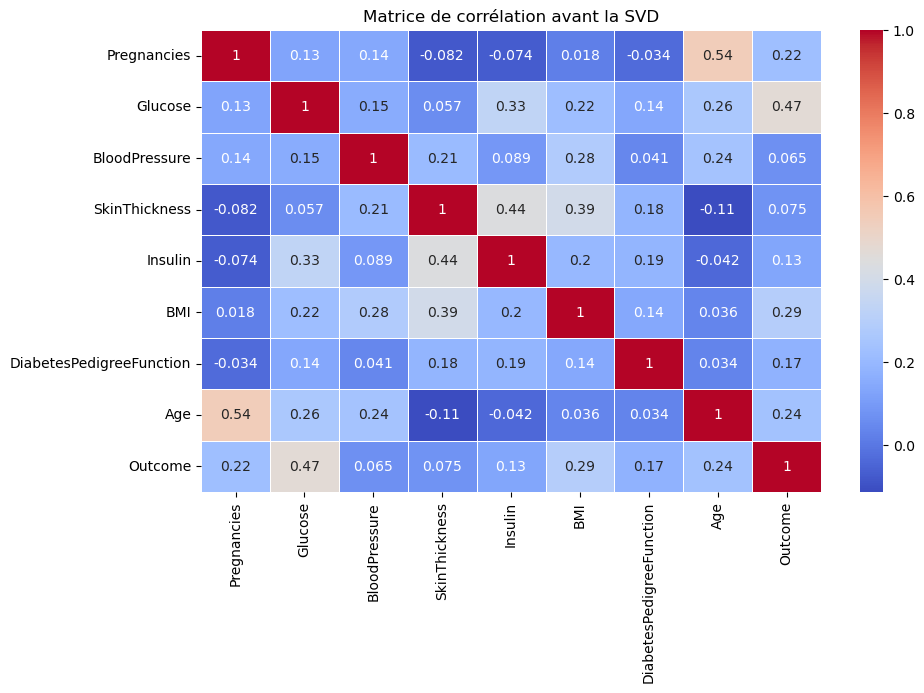

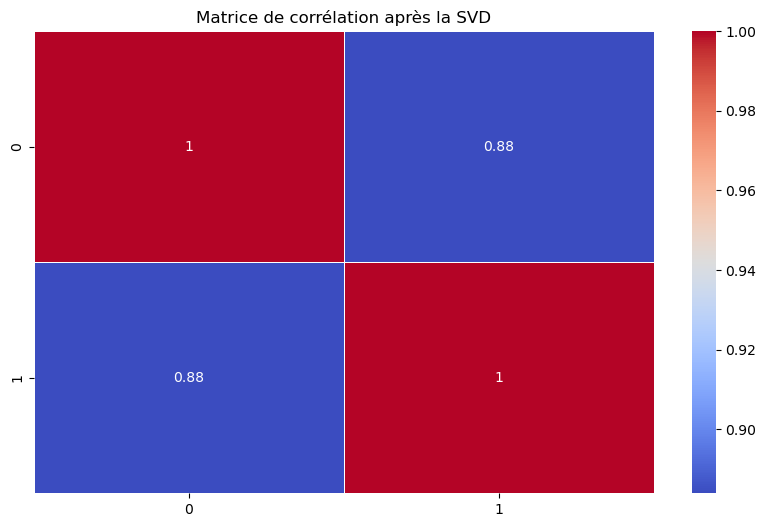

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation avant la SVD")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_svd, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation après la SVD")
plt.show()

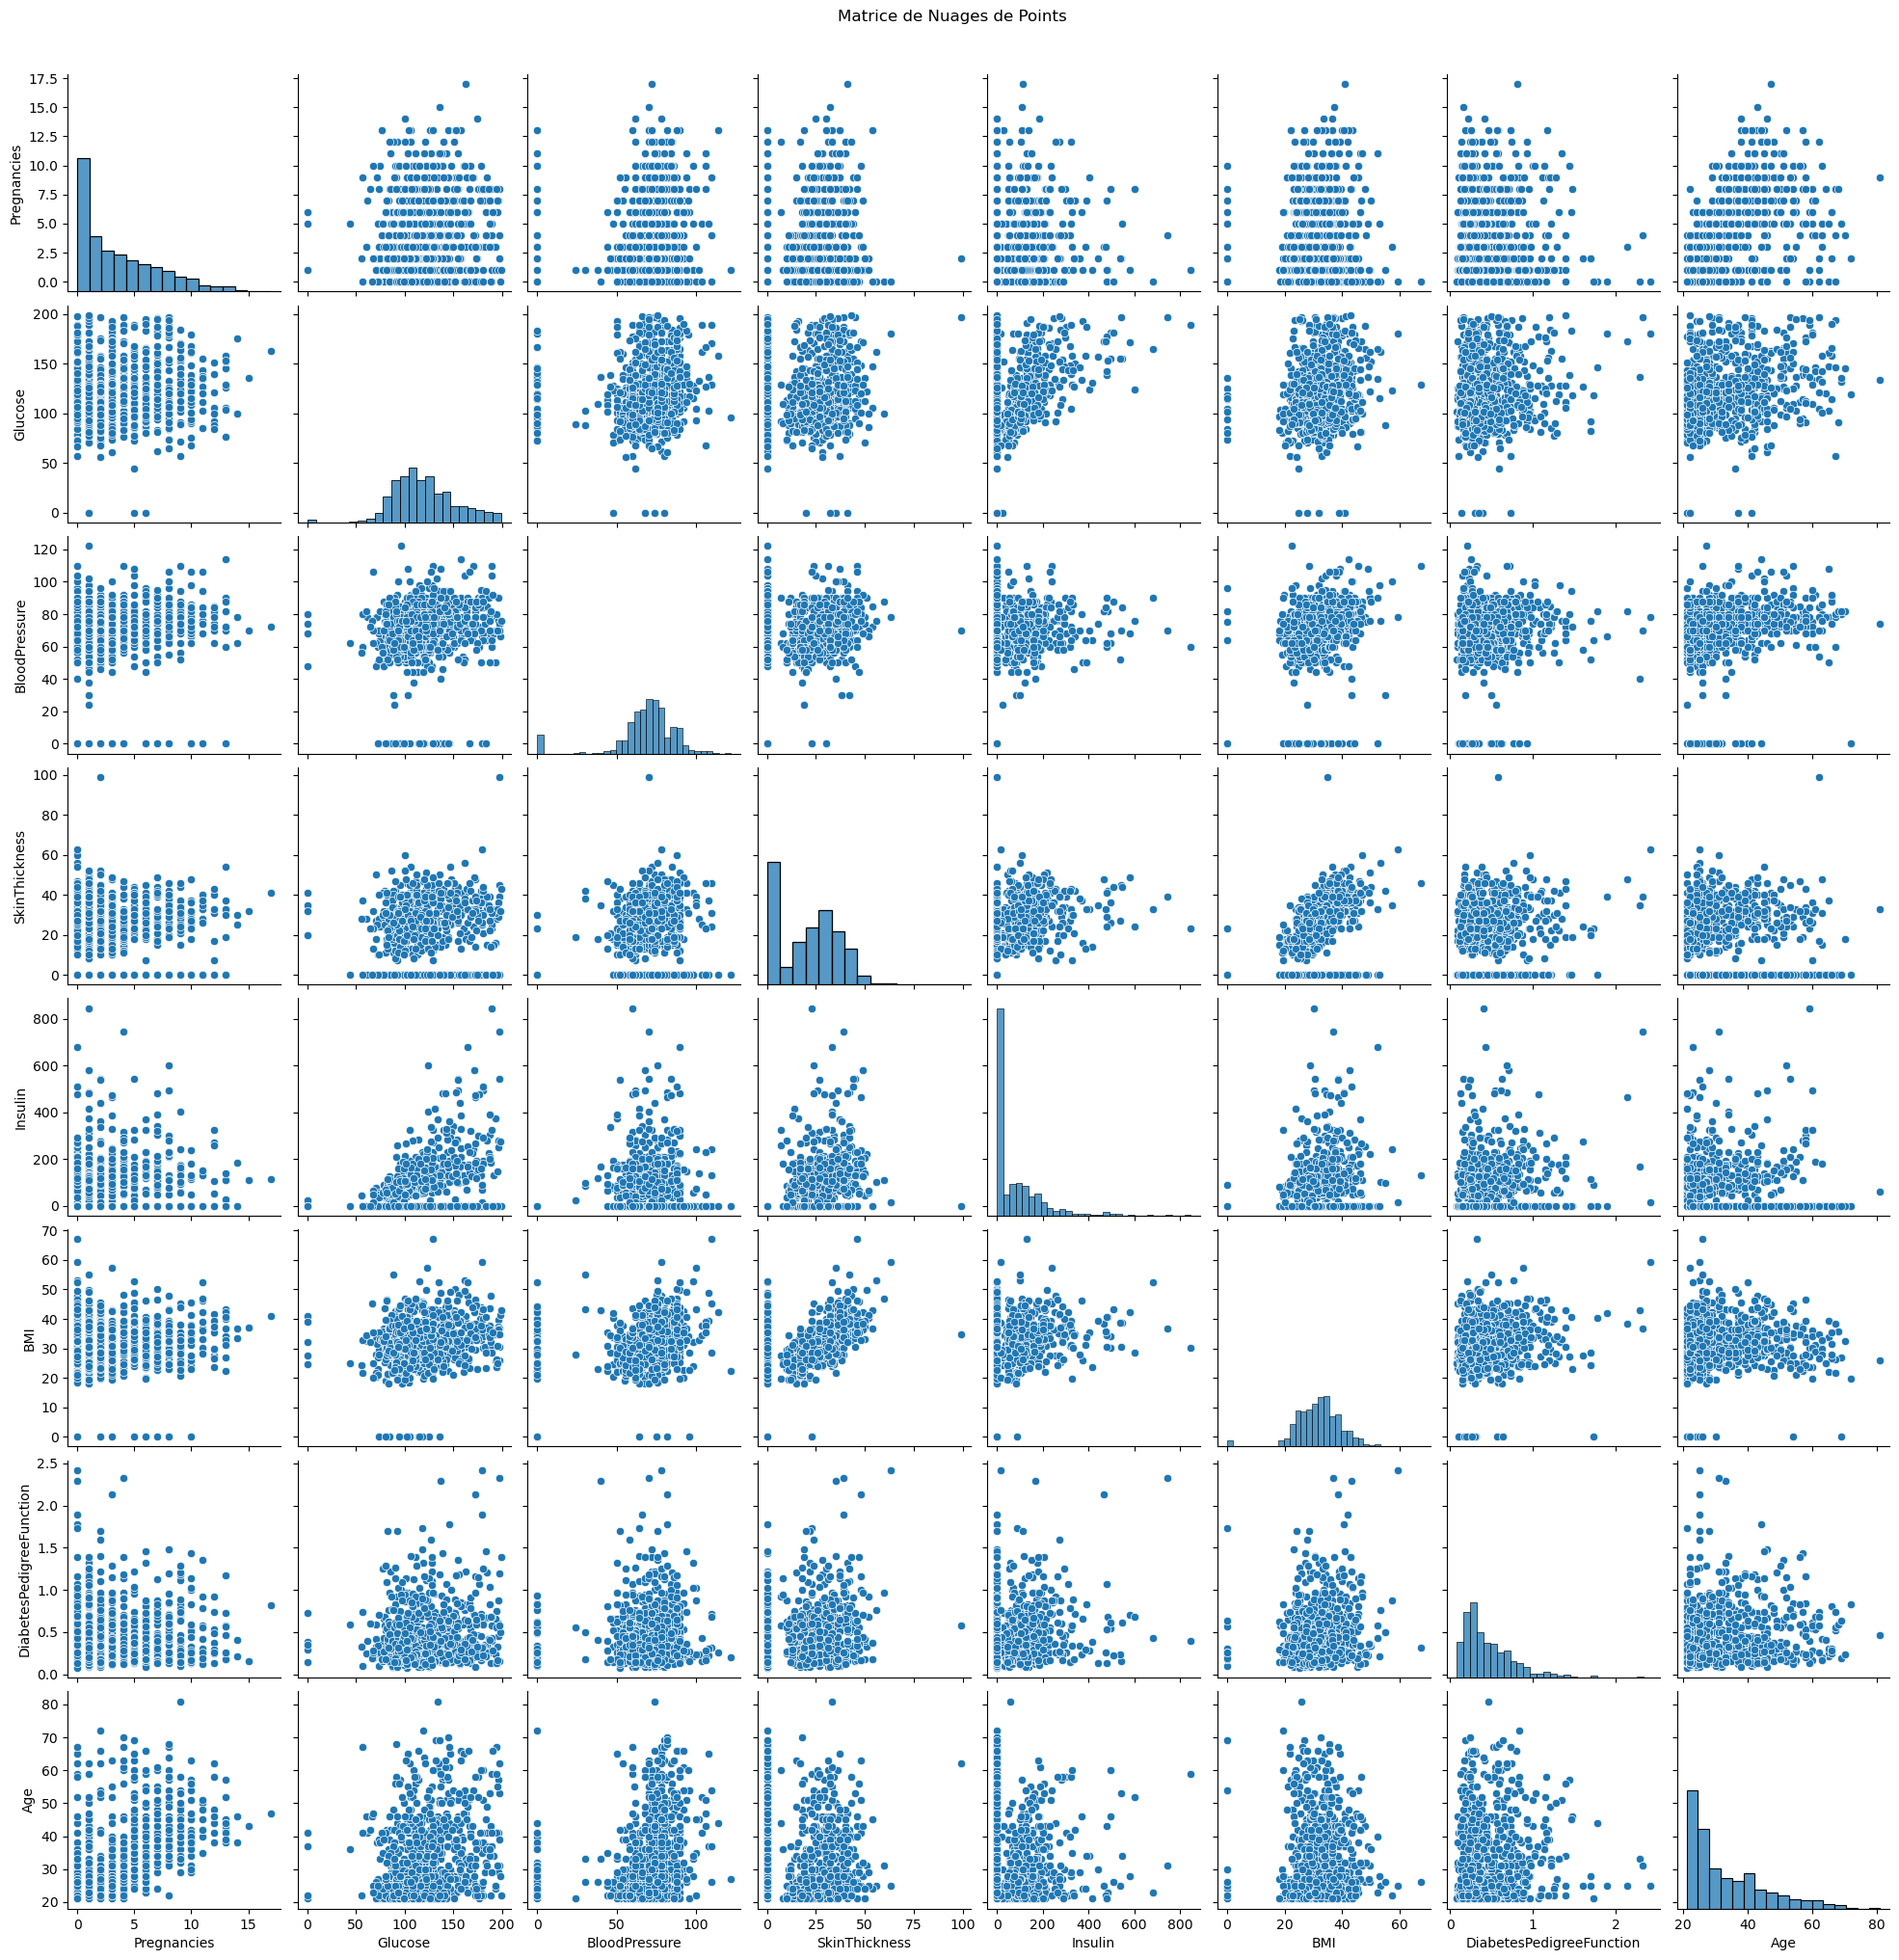

In [11]:
sns.pairplot(pd.DataFrame(X))
plt.suptitle('Matrice de Nuages de Points', y=1.02)
plt.show()

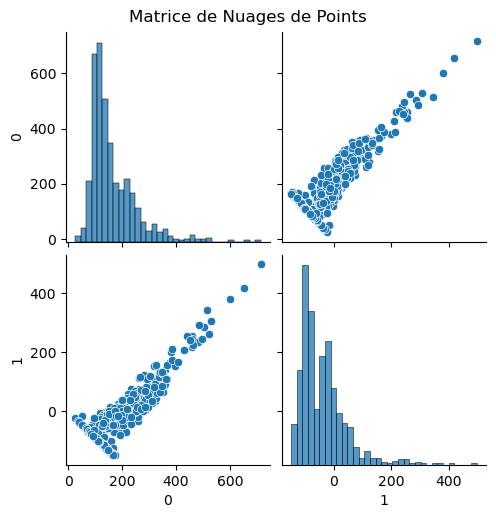

In [12]:
sns.pairplot(pd.DataFrame(X_svd))
plt.suptitle('Matrice de Nuages de Points', y=1.02)
plt.show()

In [13]:
U, s, VT = np.linalg.svd(df, full_matrices=False)

In [14]:
scores = U.dot(np.diag(s))

In [15]:
print("Matrice U :")
print(U)
print("\nVecteur s :")
print(s)
print("\nMatrice VT :")
print(VT)

Matrice U :
[[-0.02594973  0.04671973  0.00878394 ... -0.00603496 -0.04168196
   0.00010353]
 [-0.01701292  0.03073822 -0.03209308 ... -0.03685088  0.01310858
   0.00435451]
 [-0.027982    0.05087339  0.07336799 ...  0.05552154 -0.02850717
  -0.02571648]
 ...
 [-0.03599446  0.00562436 -0.00573549 ...  0.01990307  0.03281412
   0.01566602]
 [-0.02150799  0.03961211  0.02388092 ... -0.06588718 -0.0546566
   0.02124379]
 [-0.01815169  0.03264662 -0.0308107  ... -0.01922234  0.01679858
   0.00917264]]

Vecteur s :
[5142.03910158 2502.73761839  612.69664151  390.58221319  298.72510563
  203.52925714   77.51696527   11.80094044    8.87811231]

Matrice VT :
[[-1.81861607e-02 -6.18921698e-01 -3.38750580e-01 -1.15286990e-01
  -6.61896903e-01 -1.57603465e-01 -2.41574946e-03 -1.60019269e-01
  -1.94557562e-03]
 [ 2.24711770e-02  5.30898186e-01  3.30599213e-01  2.90245226e-02
  -7.46743279e-01  1.40835458e-01  1.69274406e-03  1.73316364e-01
   1.52368467e-03]
 [-1.12218420e-02  5.44480583e-01 -7.52

In [16]:
corr_matrix = np.corrcoef(scores.T, df.T)


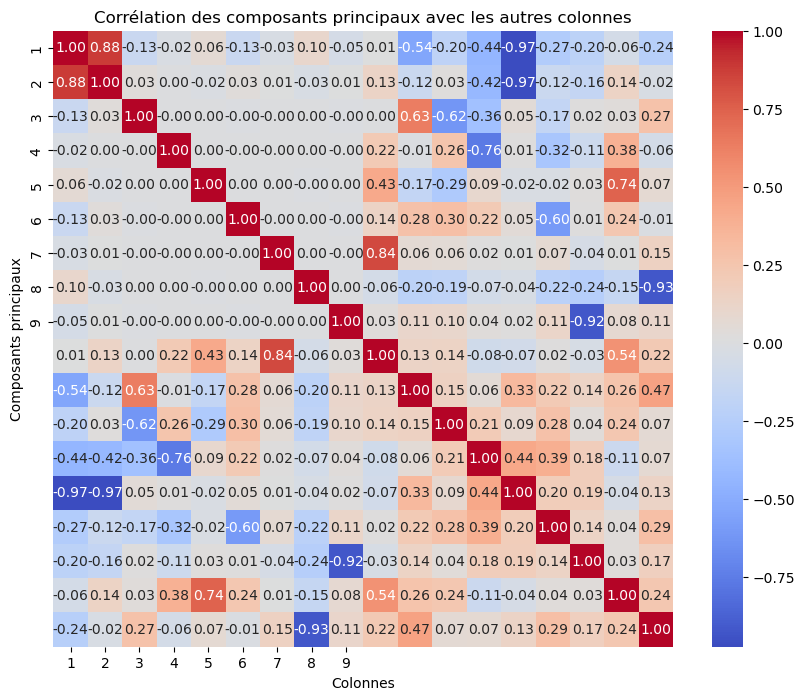

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.title("Corrélation des composants principaux avec les autres colonnes")
plt.xlabel("Colonnes")
plt.ylabel("Composants principaux")
plt.show()

In [20]:
composant1 = scores[:, 0]
composant2 = scores[:, 1]

In [23]:
correlation_composant1 = np.corrcoef(composant1, df.T)[0, 1:]
correlation_composant2 = np.corrcoef(composant2, df.T)[0, 1:]

In [24]:
print("Corrélation du composant 1 avec les autres colonnes :")
print(correlation_composant1)

Corrélation du composant 1 avec les autres colonnes :
[ 0.0133545  -0.53890952 -0.20146161 -0.43525851 -0.96862025 -0.26801505
 -0.20294619 -0.06106378 -0.23625279]


In [25]:
print("\nCorrélation du composant 2 avec les autres colonnes :")
print(correlation_composant2)


Corrélation du composant 2 avec les autres colonnes :
[ 0.12955112 -0.11914659  0.02742888 -0.42333777 -0.97232465 -0.12352348
 -0.15921867  0.14305202 -0.02488312]


In [31]:
corr_df = pd.DataFrame({'Composant 1': correlation_composant1, 'Composant 2': correlation_composant2})

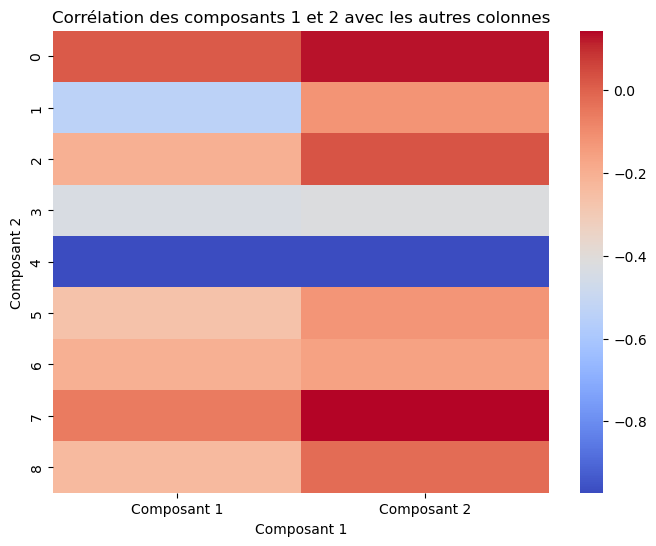

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_df, cmap='coolwarm')
plt.title("Corrélation des composants 1 et 2 avec les autres colonnes")
plt.xlabel("Composant 1")
plt.ylabel("Composant 2")
plt.show()

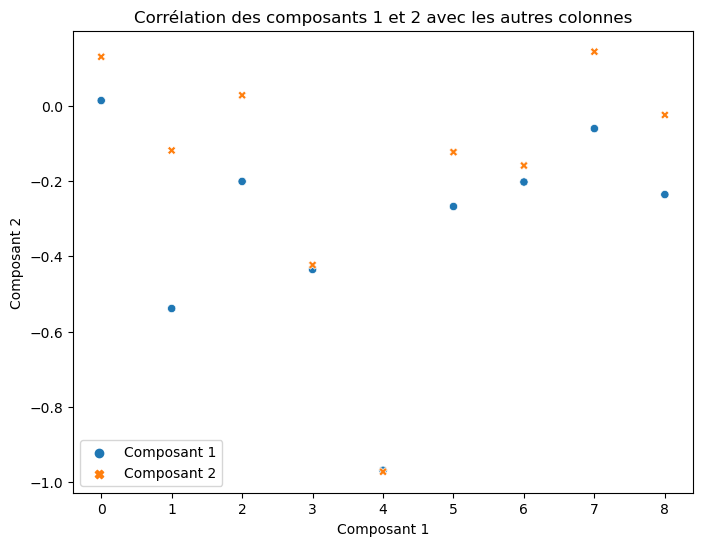

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=corr_df, cmap='coolwarm')
plt.title("Corrélation des composants 1 et 2 avec les autres colonnes")
plt.xlabel("Composant 1")
plt.ylabel("Composant 2")
plt.show()